<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/random_forest_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
x,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x

In [19]:
x_train.shape,x_test.shape

((400, 2), (100, 2))

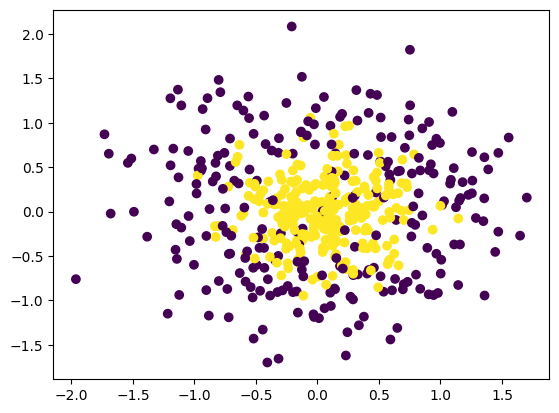

In [21]:
plt.scatter(x[:,0],x[:,1],c=y)

In [24]:
clf_dt=DecisionTreeClassifier()
clf_dt.fit(x_train,y_train)
y_pred=clf_dt.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

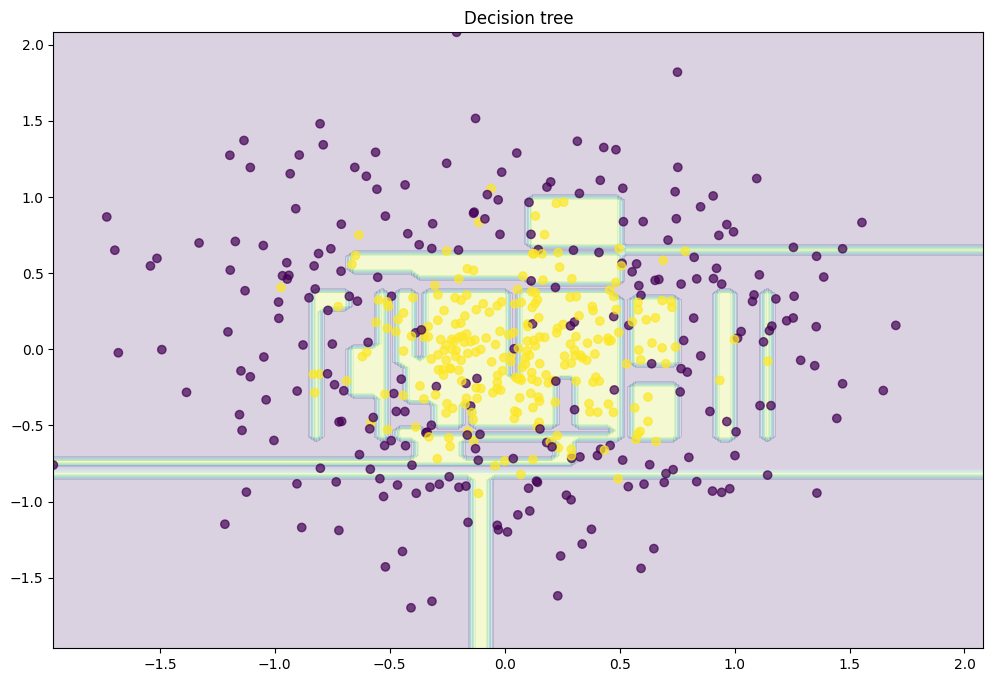

In [30]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(x.min(), x.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = clf_dt.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()


In [34]:
### now lets look through the angel of randomforest

rf_clf=RandomForestClassifier(n_estimators=500, random_state=42)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

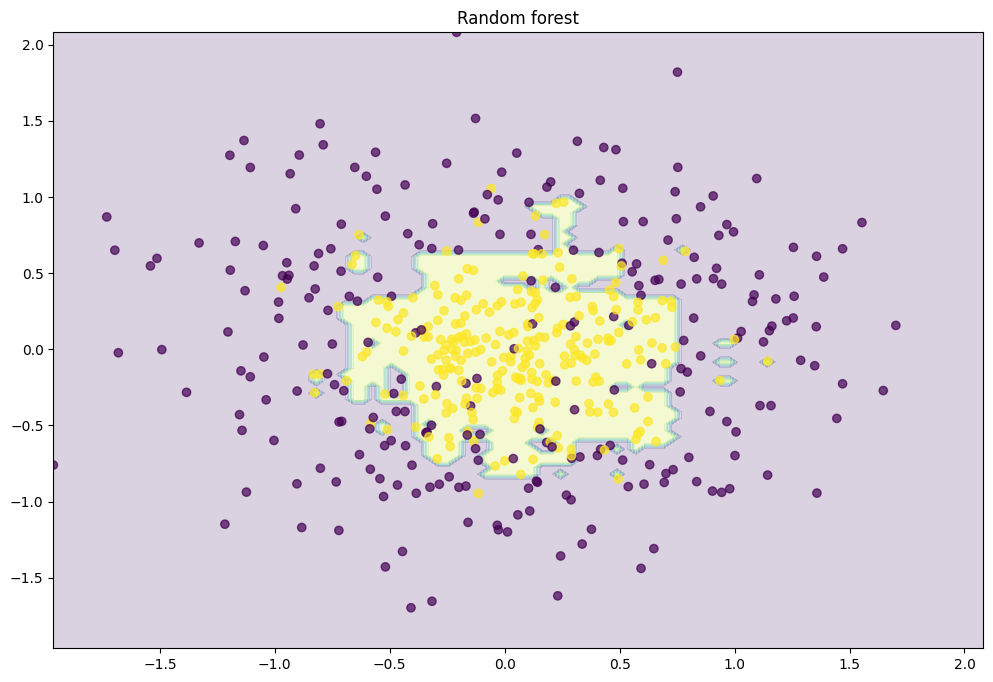

In [36]:
plt.figure(figsize=(12, 8))
x_range = np.linspace(x.min(), x.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf_clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()
#### see how the decision boundry is changed from just using the decision trees and now it is more good and not have a challenge of overfitting

#### till now we have looked for classification now lets look in the case of regression

In [46]:
### lets generate some regression data

def generate(n_samples,noise):
    x=np.random.rand(n_samples)*10-5
    x=np.sort(x).ravel()
    y=np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)+ np.random.normal(0.0, noise, n_samples)
    x=x.reshape(n_samples,1)
    return x,y


x_train,y_train=generate(150,0.1)
x_test,y_test=generate(1000,0.1)


In [48]:
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


(-5.0, 5.0)

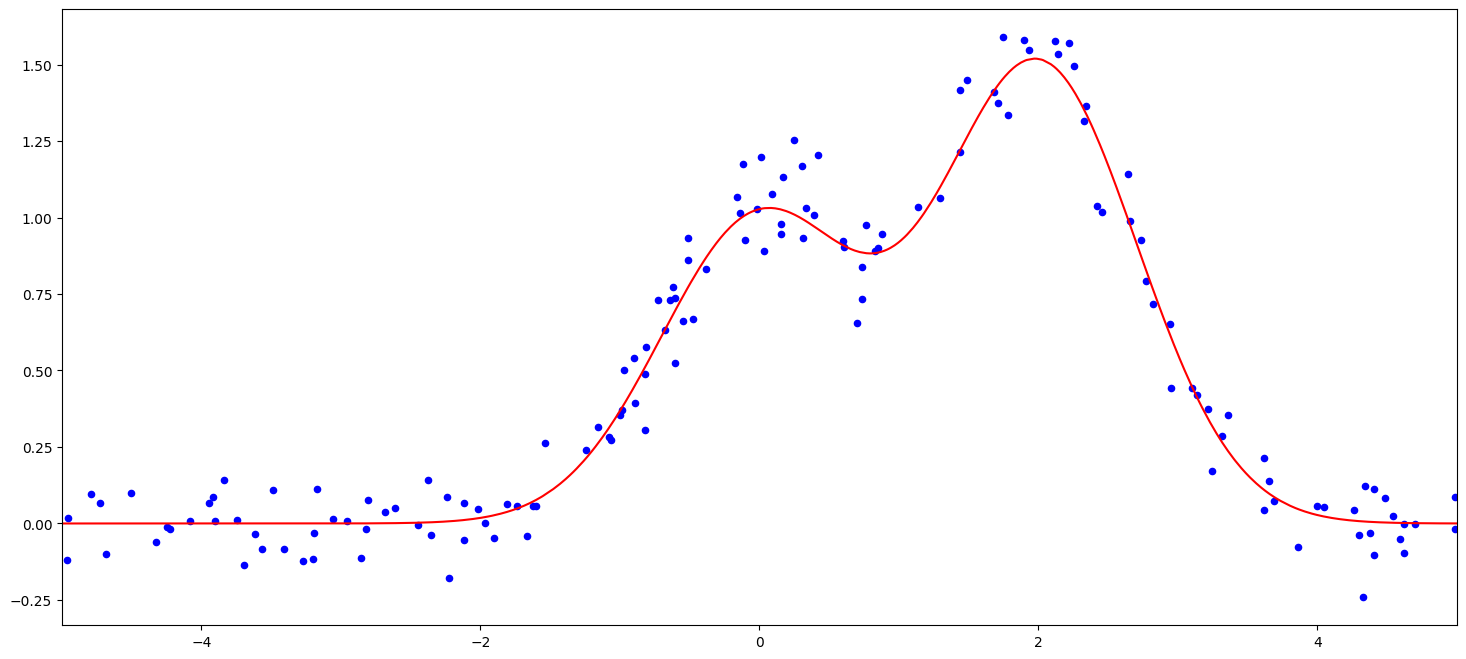

In [49]:
### good graph code
plt.figure(figsize=(18, 8))
plt.plot(x_test, f(x_test), "r")
plt.scatter(x_train, y_train, c="b", s=20)
plt.xlim([-5, 5])


In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [51]:
rg_dt=DecisionTreeRegressor()
rg_dt.fit(x_train,y_train)
d_predict = rg_dt.predict(x_test)

Text(0.5, 1.0, 'Decision tree, MSE = 18.65')

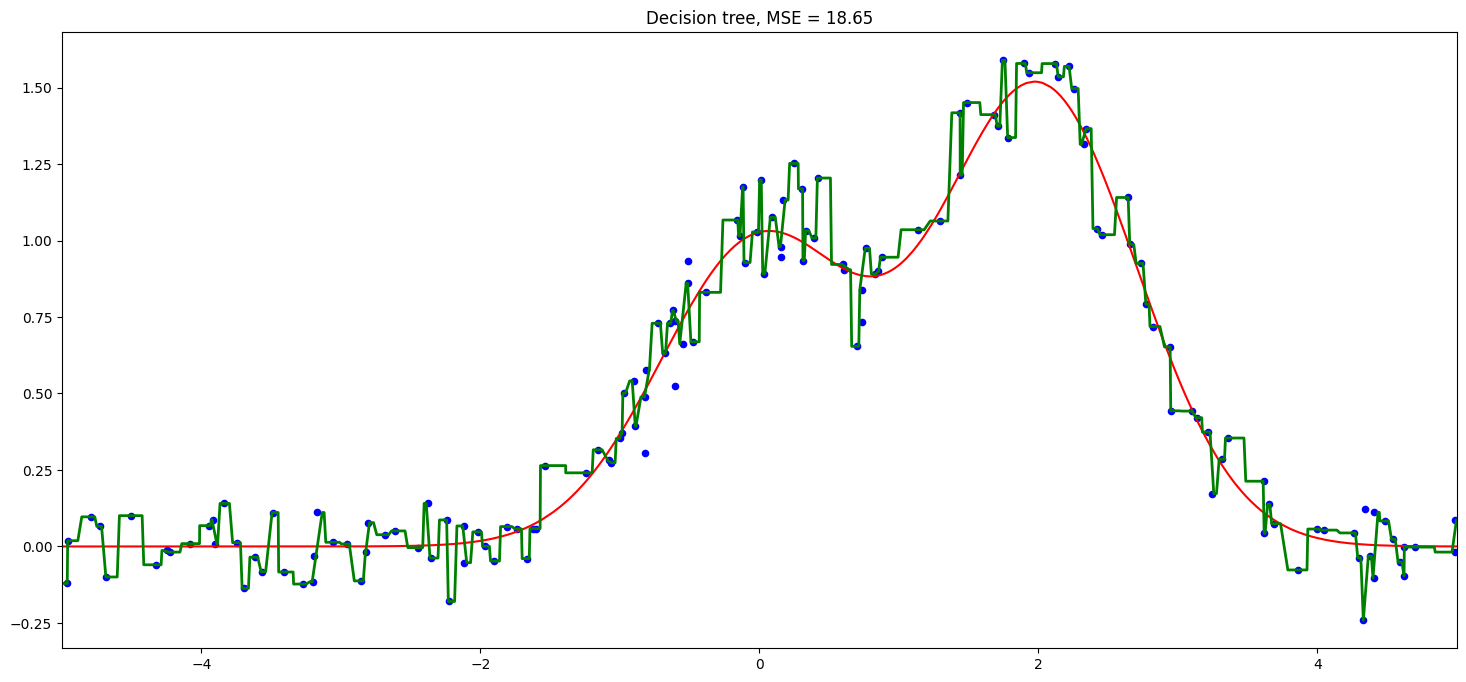

In [53]:
plt.figure(figsize=(18, 8))
plt.plot(x_test, f(x_test), "r")
plt.scatter(x_train, y_train, c="b", s=20)
plt.plot(x_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict) ** 2))

In [57]:
rg_rf=RandomForestRegressor()
rg_rf.fit(x_train,y_train)
rf_predict = rg_rf.predict(x_test)

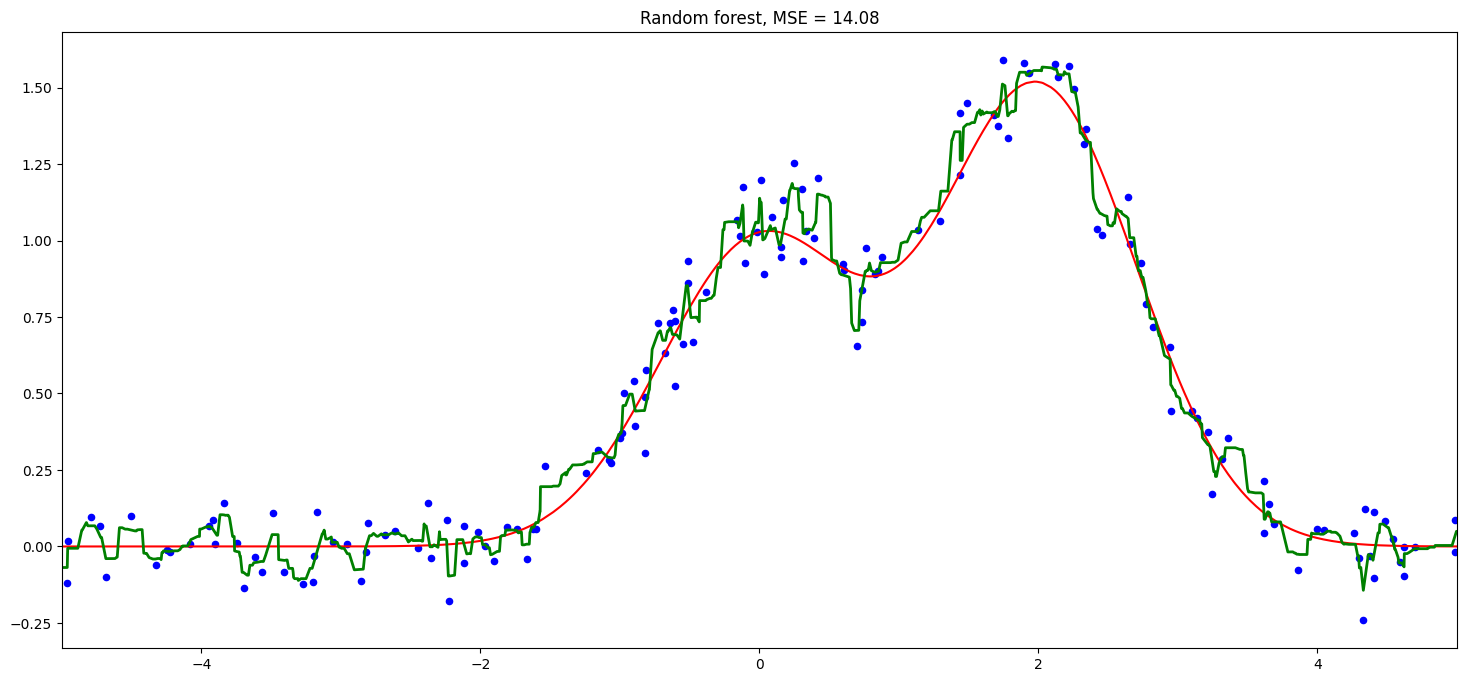

In [58]:
plt.figure(figsize=(18, 8))
plt.plot(x_test, f(x_test), "r")
plt.scatter(x_train, y_train, c="b", s=20)
plt.plot(x_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));